In [1]:
#import hierarchical 
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
Univ = pd.read_csv("E:/ExcelR/Data Science/CSV files/Universities.csv")

In [3]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:,1:])

In [6]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


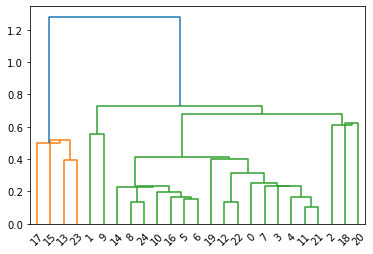

In [10]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

In [8]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [14]:
#save cluster for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [11]:
Clusters


,Clusters
0,3
1,0
2,2
3,3
4,3
5,0
6,0
7,3
8,0
9,0


In [17]:
df_norm['h_clusterid'] = hc.labels_

In [16]:
hc.labels_

array([3, 0, 1, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 2, 0, 2, 0, 2, 1, 0, 1, 3,
       3, 2, 0], dtype=int64)

In [13]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,3
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,0
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,2
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,3
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,3
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,0
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,0
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,3
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,0
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,0


In [18]:
Univ['h_clusterid'] = hc.labels_

In [19]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [20]:
Univ.to_csv("Univercity 001")

In [ ]:
#pd.concate
#write CSV on stackoverflow 